In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
def na_percent(df):
    tmp = df.isna()

    return tmp.mean(axis = 0)

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
na_percent(data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
data.iloc[:, [1, 2, 3, 4, 5]] = data.iloc[:, [1, 2, 3, 4, 5]].replace(0, np.NAN)

In [ ]:
na_percent(data)

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 1126)

In [ ]:
x_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
x_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [ ]:
smp = SimpleImputer(strategy = 'mean')
x_train.iloc[:, [1, 2, 5]] = smp.fit_transform(x_train.iloc[:, [1, 2, 5]])
x_test.iloc[:, [1, 2, 5]] = smp.transform(x_test.iloc[:, [1, 2, 5]])

In [ ]:
imp = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors = 5), random_state = 1126)
x_train.iloc[:, [3, 4]] = imp.fit_transform(x_train.iloc[:, [3, 4]])
x_test.iloc[:, [3, 4]] = imp.transform(x_test.iloc[:, [3, 4]])

In [ ]:
na_percent(x_train)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [ ]:
na_percent(x_test)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [ ]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.936482,121.601639,72.364103,30.112378,141.627036,32.408278,0.469575,33.351792
std,3.452432,30.751018,12.218474,8.985328,90.672037,6.760940,0.338696,11.911310
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,99.250000,27.525000,0.239250,24.000000
50%,3.000000,117.000000,72.000000,32.000000,118.000000,32.400000,0.369000,29.000000
75%,6.000000,140.750000,80.000000,33.000000,163.600000,36.575000,0.609250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,59.400000,2.420000,81.000000


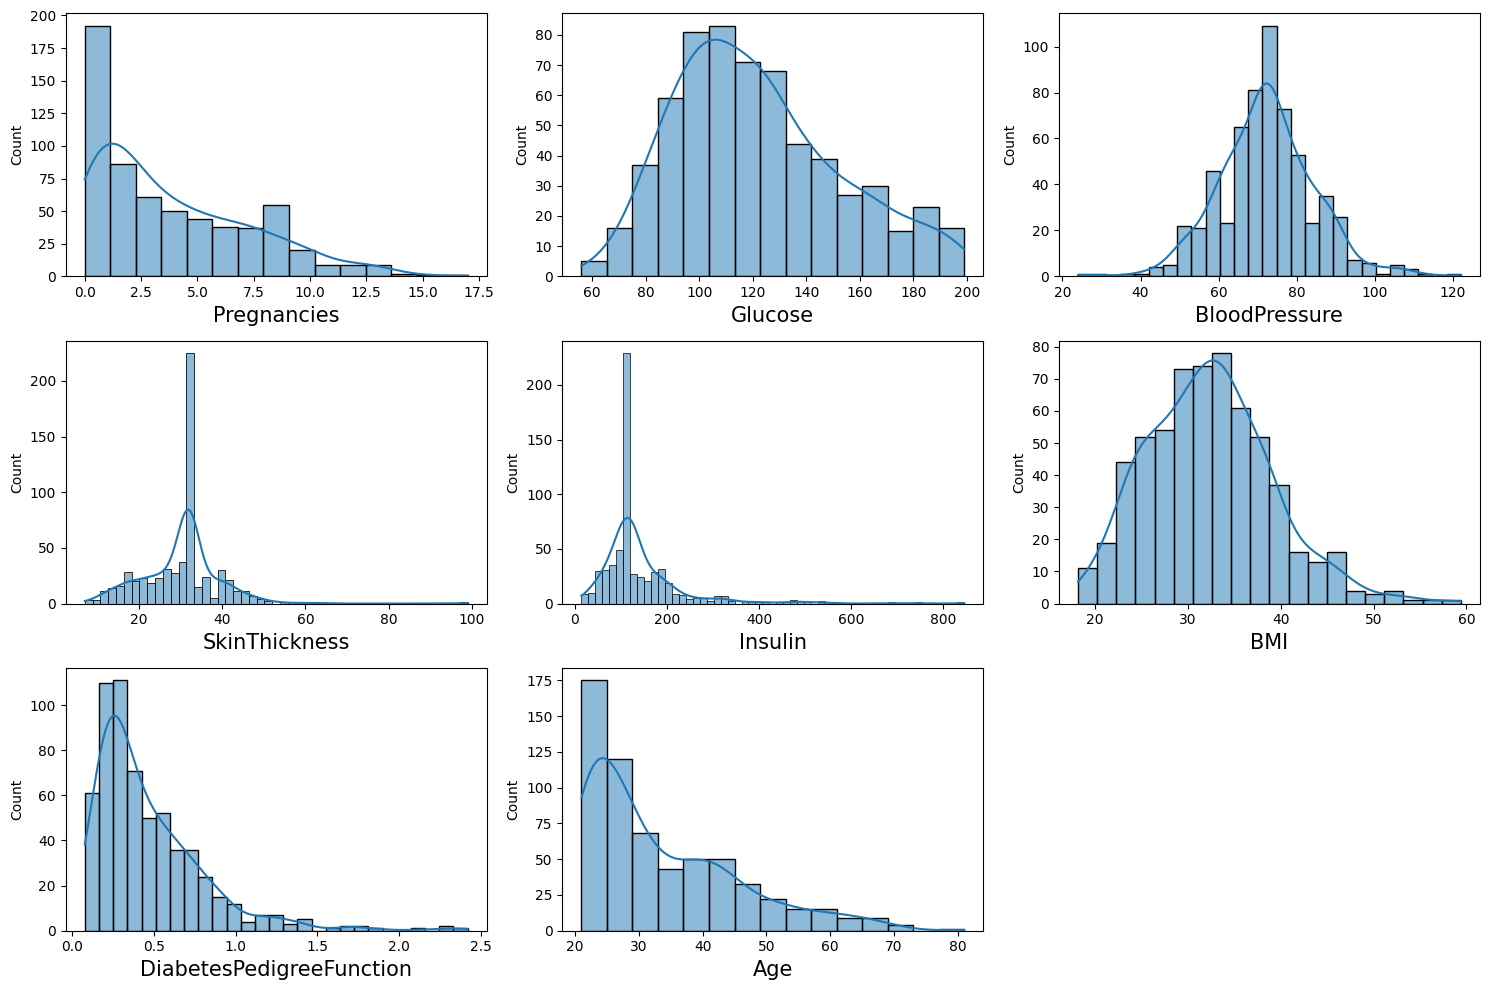

In [ ]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(x_train.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data = x_train, x = col, kde = True)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.tight_layout()

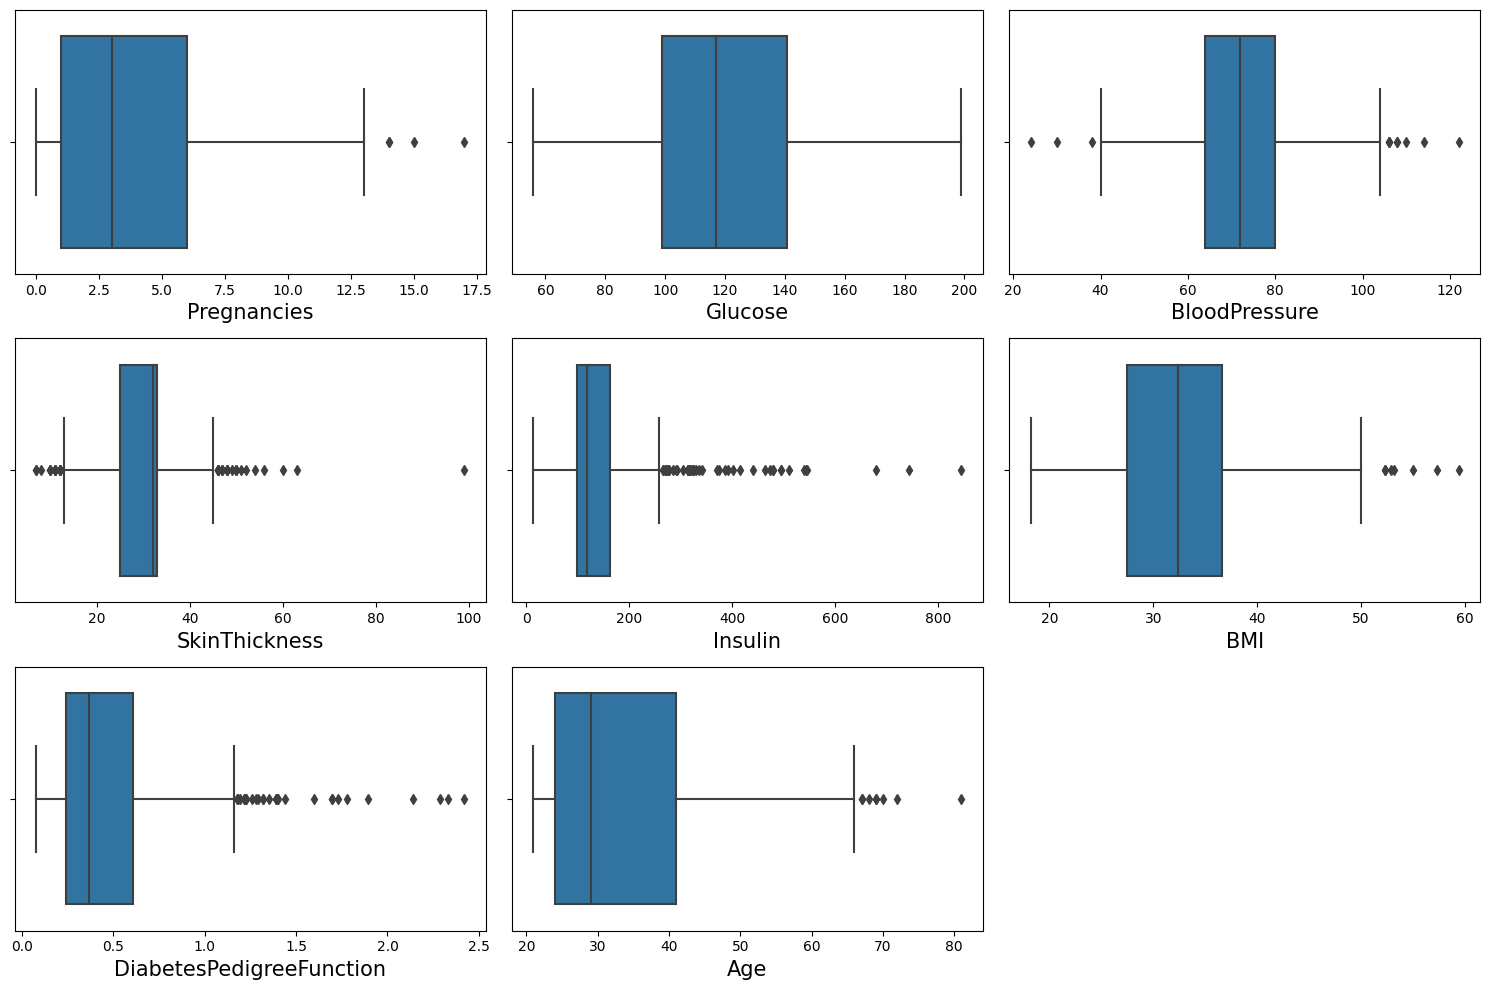

In [ ]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(x_train.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data = x_train, x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.tight_layout()

In [ ]:
x_train['Age_cat']= pd.cut(x_train['Age'], bins = [0, 30 ,50, 81], labels=['Young Adult', 'Adult', 'Old'])

x_train.loc[(x_train['Pregnancies'] == 0), 'Pregnancies_cat']  = 'Never'
x_train.loc[(x_train['Pregnancies'] == 1), 'Pregnancies_cat']  = 'One Time'
x_train.loc[(x_train['Pregnancies'] > 1), 'Pregnancies_cat']   = 'Many Times'

x_train = x_train.drop(['Age', 'Pregnancies'], axis = 1)

In [ ]:
x_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_cat,Pregnancies_cat
118,97.0,60.0,23.0,94.0,28.2,0.443,Young Adult,Many Times
571,130.0,96.0,32.0,118.0,22.6,0.268,Young Adult,Many Times
12,139.0,80.0,32.0,118.0,27.1,1.441,Old,Many Times
498,195.0,70.0,33.0,145.0,25.1,0.163,Old,Many Times
113,76.0,62.0,32.0,118.0,34.0,0.391,Young Adult,Many Times


In [ ]:
pt = PowerTransformer(method = 'box-cox')
x_train.iloc[:, [5]] = pt.fit_transform(x_train.iloc[:, [5]])

In [ ]:
x_train.iloc[:, [2, 3]] = np.log(x_train.iloc[:, [2, 3]])
# x_train.iloc[:, [0]] = x_train.iloc[:, [0]] ** (1/2)

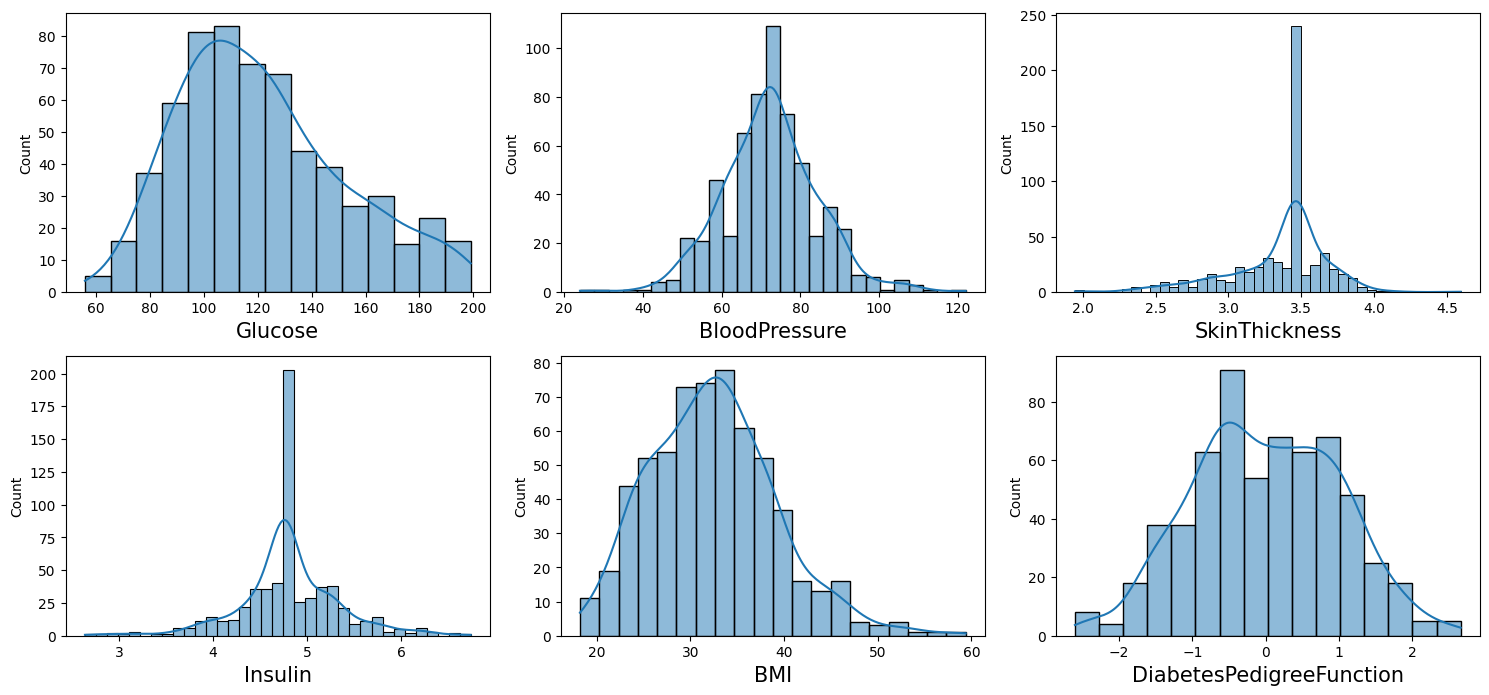

In [ ]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(x_train.columns[:-2]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data = x_train, x = col, kde = True)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.tight_layout()

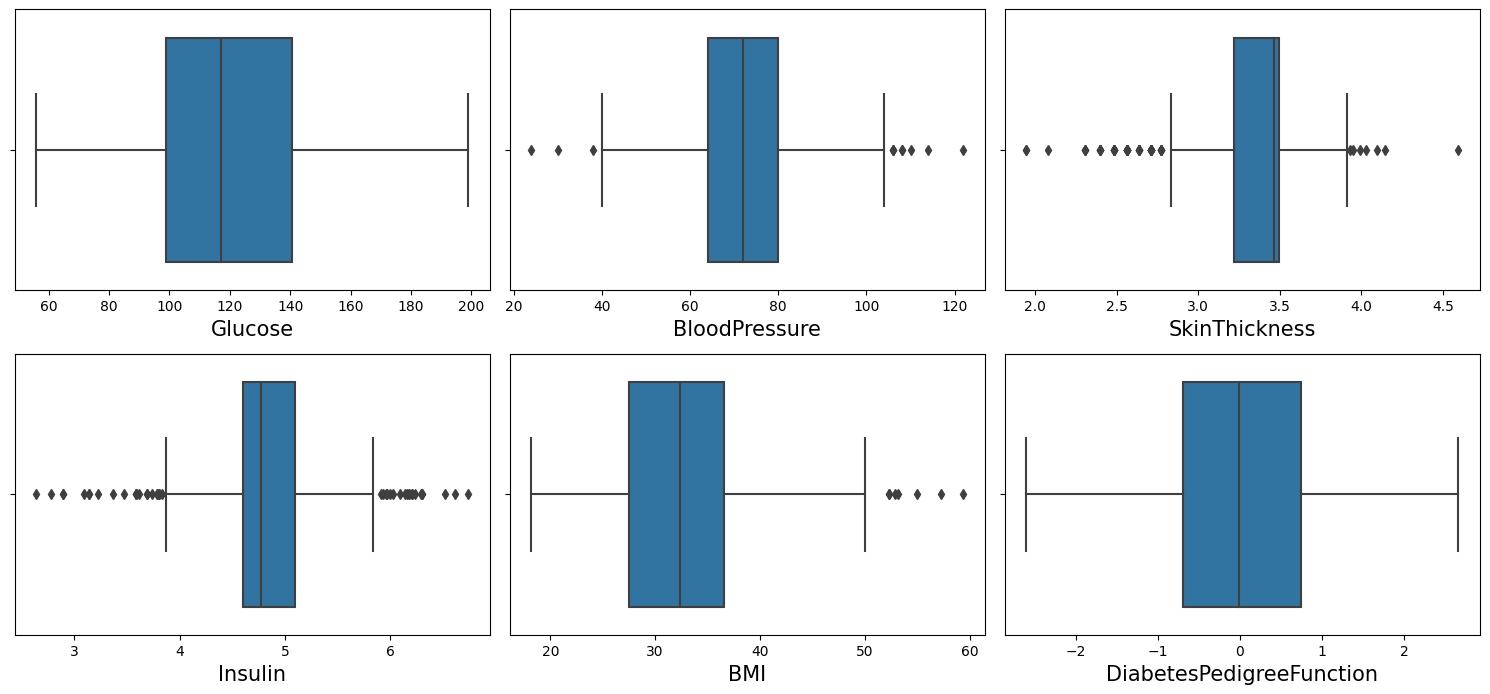

In [ ]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(x_train.columns[:-2]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data = x_train, x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.tight_layout()

In [ ]:
x_test['Age_cat']= pd.cut(x_test['Age'], bins = [0, 30 ,50, 81], labels=['Young Adult', 'Adult', 'Old'])

x_test.loc[(x_test['Pregnancies'] == 0), 'Pregnancies_cat']  = 'Never'
x_test.loc[(x_test['Pregnancies'] == 1), 'Pregnancies_cat']  = 'One Time'
x_test.loc[(x_test['Pregnancies'] > 1), 'Pregnancies_cat']   = 'Many Times'

x_test = x_test.drop(['Age', 'Pregnancies'], axis = 1)

In [ ]:
x_test.iloc[:, [5]] = pt.transform(x_test.iloc[:, [5]])
x_test.iloc[:, [2, 3]] = np.log(x_test.iloc[:, [2, 3]])
# x_test.iloc[:, [0]] = x_test.iloc[:, [0]] ** (1/2)

In [ ]:
tmp = [i for i in range(5)]

sc = StandardScaler()
x_train.iloc[:, tmp] = sc.fit_transform(x_train.iloc[:, tmp])
x_test.iloc[:, tmp] = sc.transform(x_test.iloc[:, tmp])

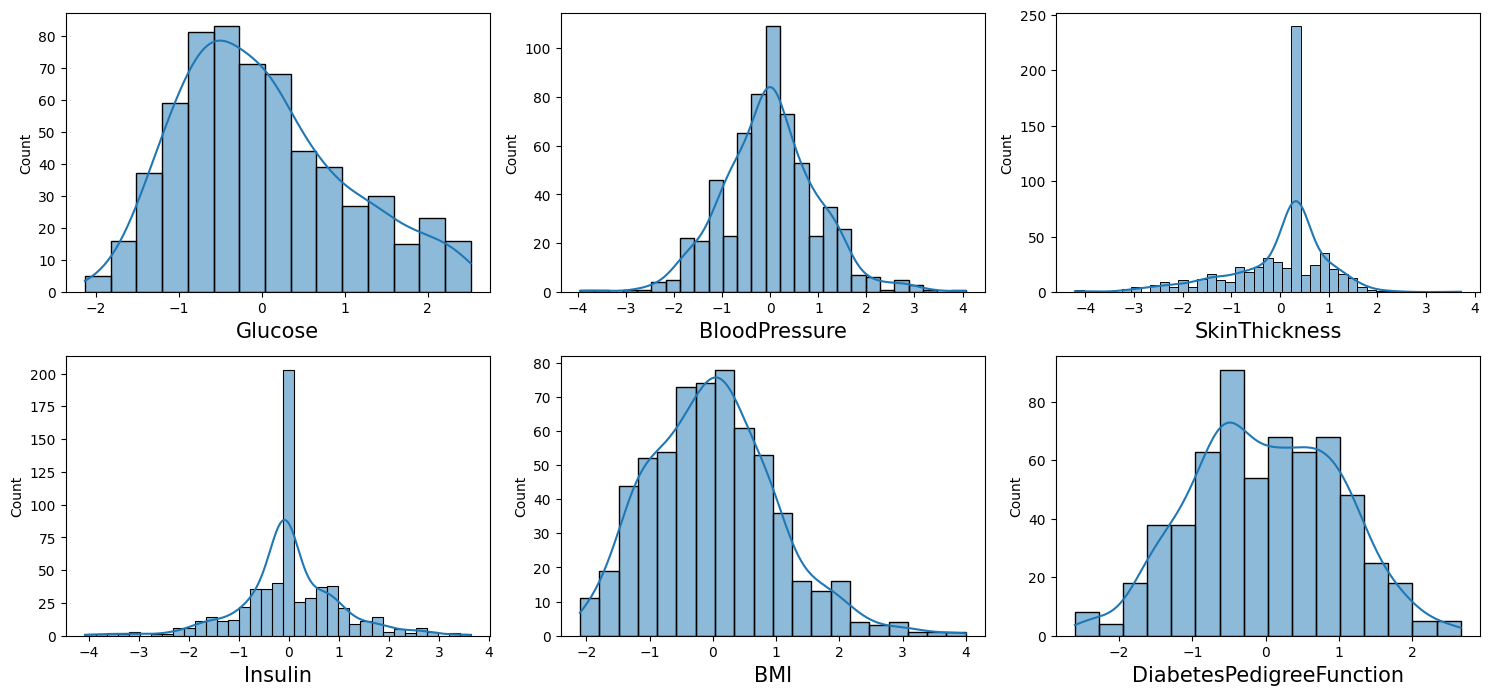

In [ ]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(x_train.columns[:-2]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data = x_train, x = col, kde = True)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.tight_layout()

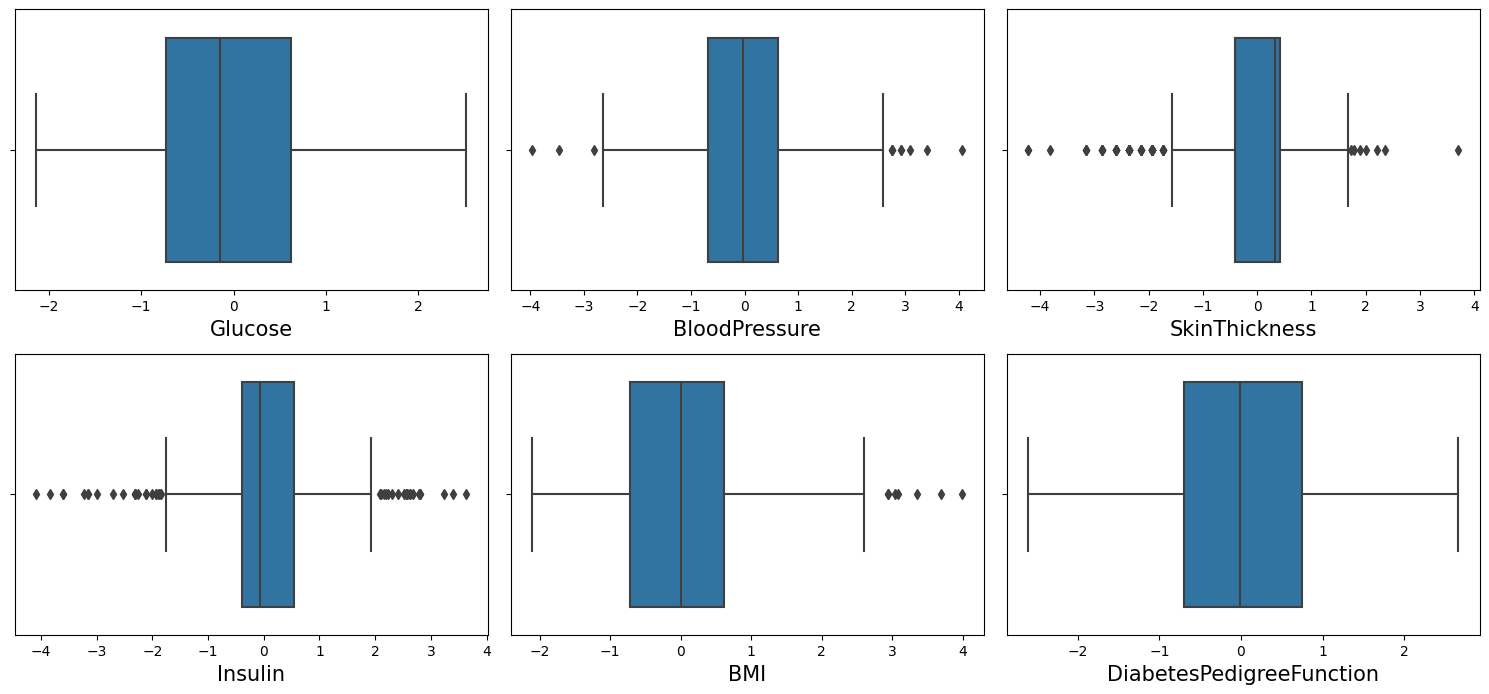

In [ ]:
plt.figure(figsize = (15, 10))

for i, col in enumerate(x_train.columns[:-2]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data = x_train, x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.tight_layout()

<Axes: >

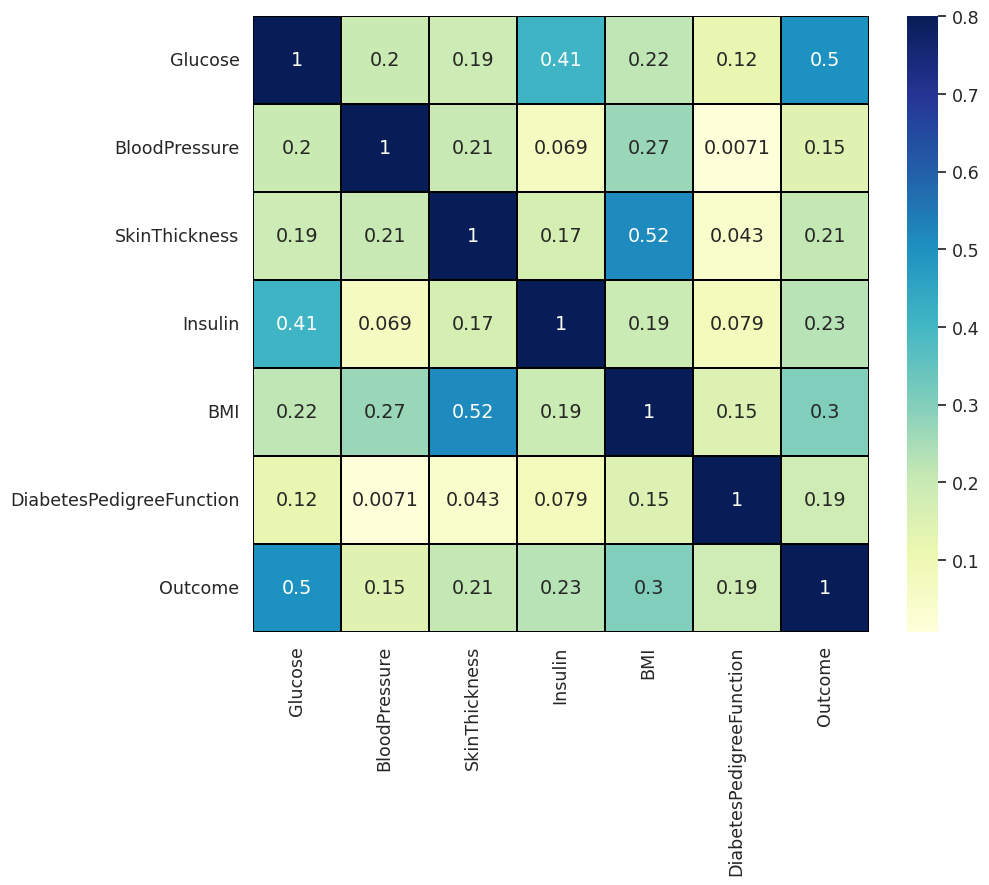

In [ ]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (10, 8))
sns.heatmap(pd.concat([x_train.iloc[:, :-2], y_train], axis = 1).corr(), vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='YlGnBu',
linecolor = 'black')

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.3 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

encoder = ce.LeaveOneOutEncoder(cols = ['Age_cat', 'Pregnancies_cat'], sigma = 0.05)
x_train = encoder.fit_transform(x_train, y_train)

In [ ]:
x_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age_cat,Pregnancies_cat
118,-0.800679,-1.012744,-0.655747,-0.497742,-0.622947,0.268454,0.220051,0.392581
571,0.273331,1.936017,0.331861,-0.069912,-1.451910,-0.515841,0.212172,0.360127
12,0.566243,0.625456,0.331861,-0.069912,-0.785779,1.972465,0.470846,0.394751
498,2.388806,-0.193644,0.423885,0.317767,-1.081837,-1.328398,0.447396,0.351900
113,-1.484140,-0.848924,0.331861,-0.069912,0.235621,0.076983,0.208376,0.362592


In [ ]:
x_test = encoder.transform(x_test)

<Axes: xlabel='Outcome', ylabel='count'>

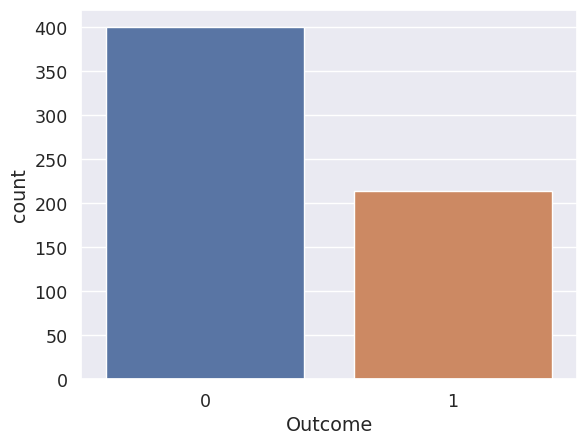

In [ ]:
sns.countplot(x = y_train)

In [ ]:
x_train, y_train = x_train.values, y_train.values
x_test, y_test = x_test.values, y_test.values

In [ ]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

In [ ]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])

    print(f'accuracy: {acc:.3f}')
    print(f'precision: {precision:.3f}')
    print(f'recall: {recall:.3f}')
    print(f'f1: {f1:.3f}')
    print(f'auc: {auc:.3f}')

In [ ]:
def plot_confusion_matrix(model, x_test, y_test):
  y_pred = model.predict(x_test)

  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  plt.show()

In [ ]:
def plot_roc(model, x_test, y_test):

  RocCurveDisplay.from_estimator(model, x_test, y_test)
  plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter = 500, class_weight = 'balanced')
model1.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
evaluate(model1, x_train, y_train)

accuracy: 0.767
precision: 0.644
recall: 0.743
f1: 0.690
auc: 0.851


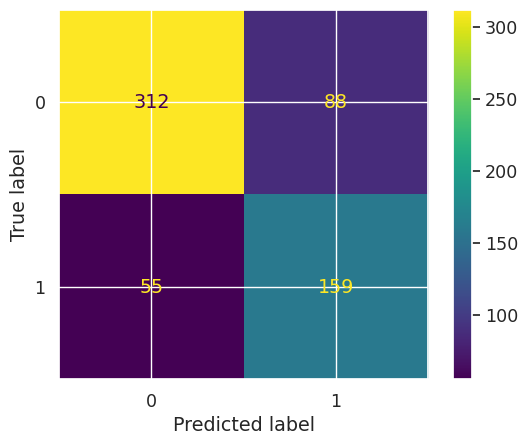

In [ ]:
plot_confusion_matrix(model1, x_train, y_train)

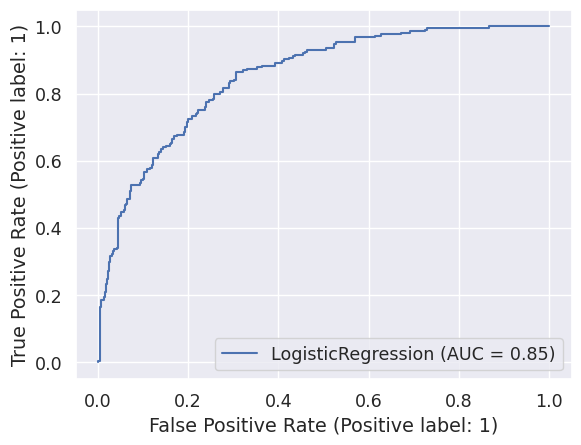

In [ ]:
plot_roc(model1, x_train, y_train)

In [ ]:
evaluate(model1, x_test, y_test)

accuracy: 0.747
precision: 0.612
recall: 0.759
f1: 0.678
auc: 0.831


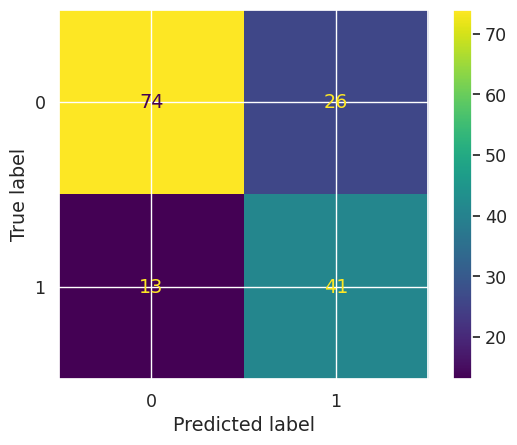

In [ ]:
plot_confusion_matrix(model1, x_test, y_test)

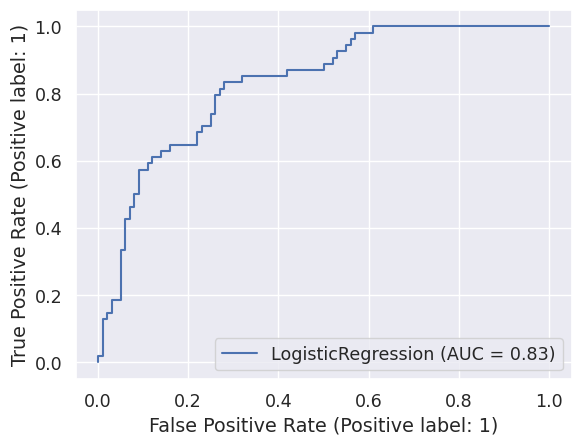

In [ ]:
plot_roc(model1, x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 75, max_depth = 3, random_state = 1126, class_weight = 'balanced')
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=75,
                       random_state=1126)

In [ ]:
evaluate(rf, x_train, y_train)

accuracy: 0.796
precision: 0.668
recall: 0.827
f1: 0.739
auc: 0.888


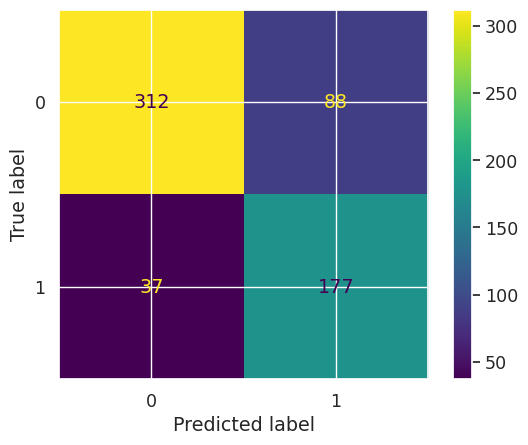

In [ ]:
plot_confusion_matrix(rf, x_train, y_train)

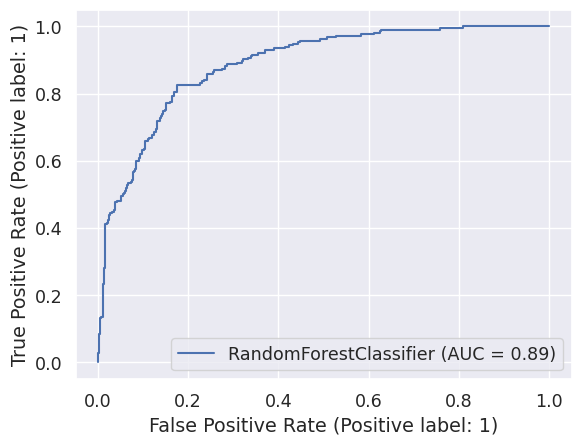

In [ ]:
plot_roc(rf, x_train, y_train)

In [ ]:
evaluate(rf, x_test, y_test)

accuracy: 0.792
precision: 0.683
recall: 0.759
f1: 0.719
auc: 0.831


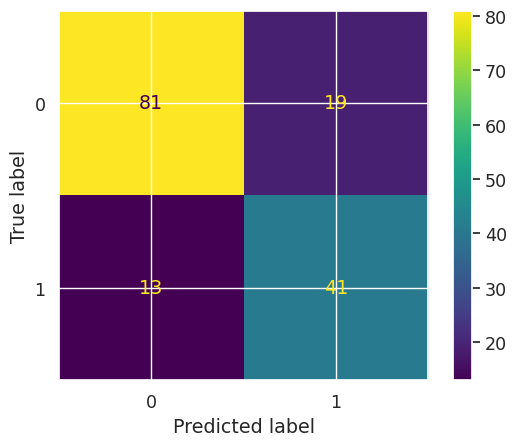

In [ ]:
plot_confusion_matrix(rf, x_test, y_test)

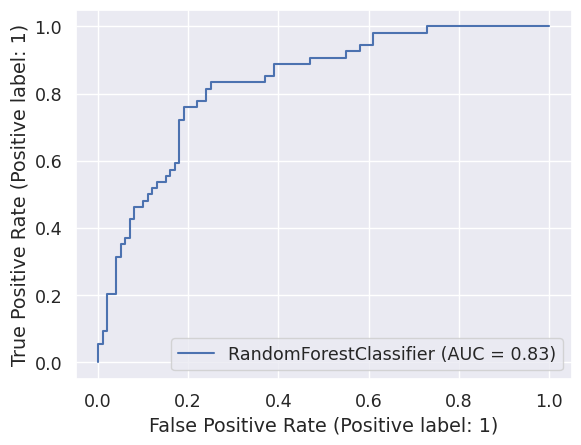

In [ ]:
plot_roc(rf, x_test, y_test)

In [ ]:
from sklearn.svm import SVC

svm = SVC(class_weight = 'balanced', random_state = 1126, C = 0.3, probability = True)
svm.fit(x_train, y_train)

SVC(C=0.3, class_weight='balanced', probability=True, random_state=1126)

In [ ]:
evaluate(svm, x_train, y_train)

accuracy: 0.756
precision: 0.618
recall: 0.785
f1: 0.691
auc: 0.855


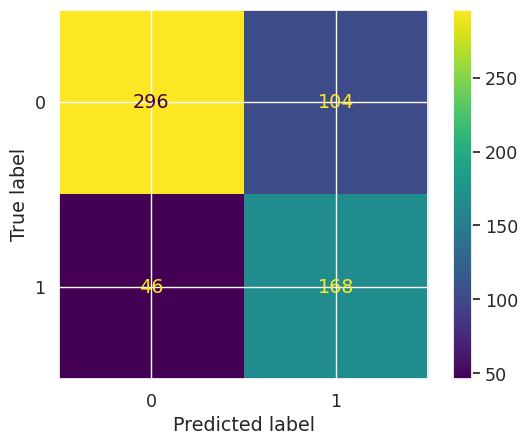

In [ ]:
plot_confusion_matrix(svm, x_train, y_train)

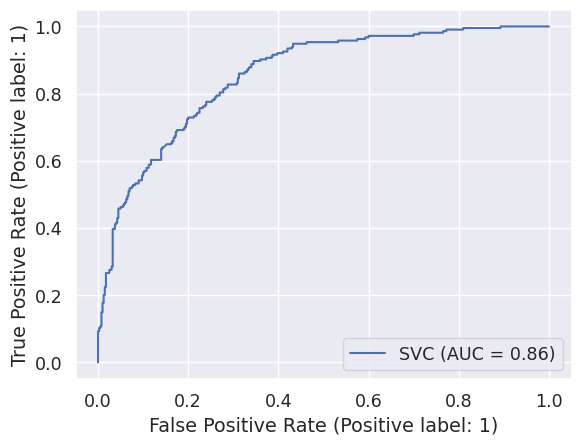

In [ ]:
plot_roc(svm, x_train, y_train)

In [ ]:
evaluate(svm, x_test, y_test)

accuracy: 0.766
precision: 0.632
recall: 0.796
f1: 0.705
auc: 0.832


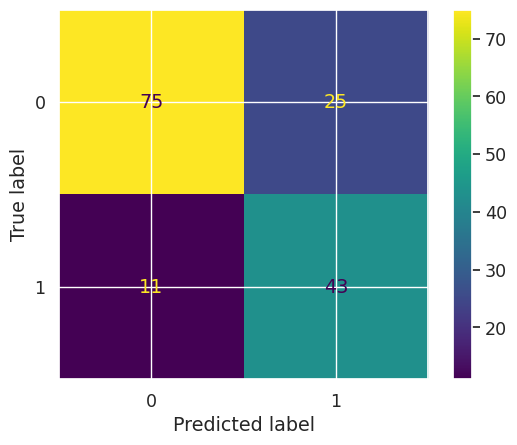

In [ ]:
plot_confusion_matrix(svm, x_test, y_test)

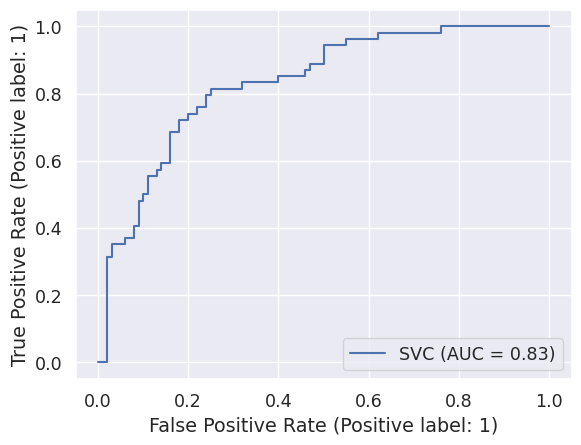

In [ ]:
plot_roc(svm, x_test, y_test)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight = 1.8692, learning_rate = 0.01, n_estimators = 100, max_depth = 3, subsample = 0.3)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
evaluate(xgb, x_train, y_train)

accuracy: 0.793
precision: 0.675
recall: 0.785
f1: 0.726
auc: 0.885


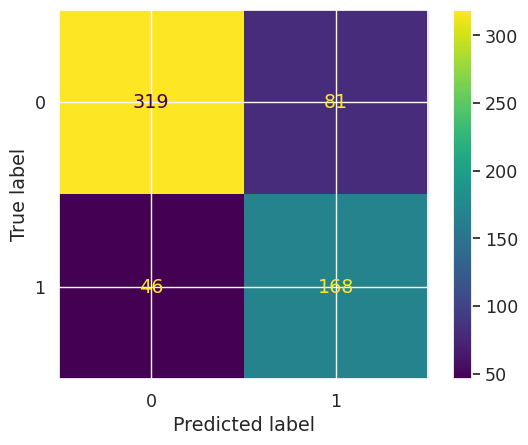

In [ ]:
plot_confusion_matrix(xgb, x_train, y_train)

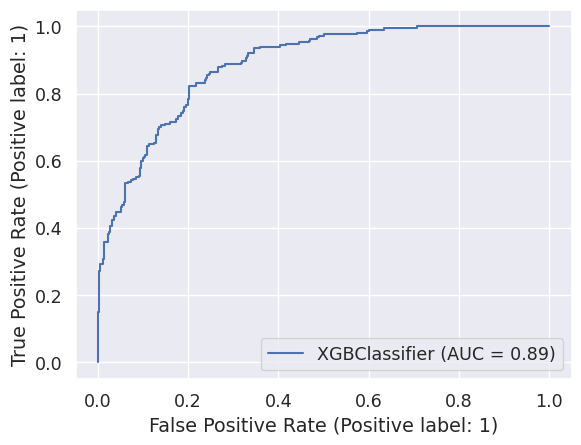

In [ ]:
plot_roc(xgb, x_train, y_train)

In [ ]:
evaluate(xgb, x_test, y_test)

accuracy: 0.799
precision: 0.702
recall: 0.741
f1: 0.721
auc: 0.830


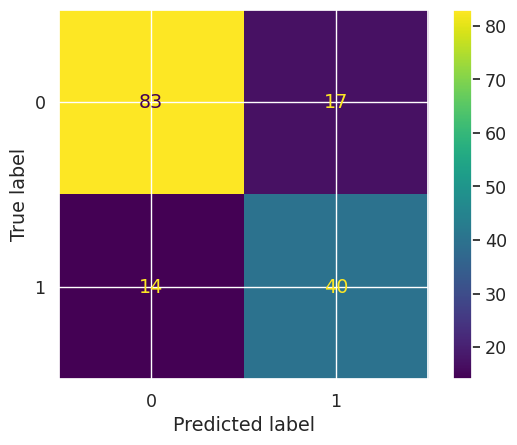

In [ ]:
plot_confusion_matrix(xgb, x_test, y_test)

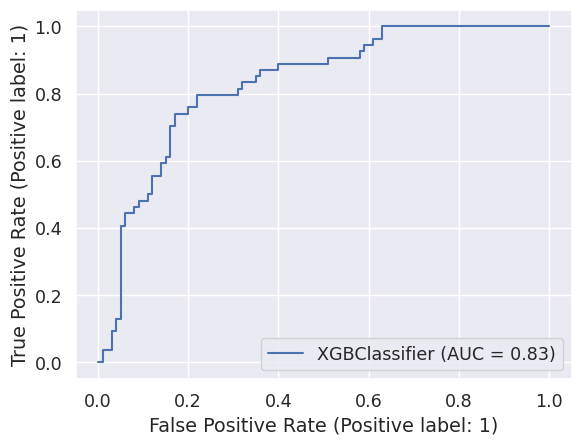

In [ ]:
plot_roc(xgb, x_test, y_test)